## Brazilian E-Commerce Data

### An analysis of E-Commerce data from Olist

the data can be found on Kaggle at [this link](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

<img src="data_schema.png" width=750>

## Step 1) Import Libraries and Data

In [214]:
import pandas as pd
import glob
import os
import datetime
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns

In [215]:
path = os.getcwd()
csv_files = glob.glob(path + "/*.csv")

csv_files

['/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_sellers_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/product_category_name_translation.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_orders_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_order_items_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_customers_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_geolocation_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_order_payments_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_order_reviews_dataset.csv',
 '/Users/raws/Documents/GitHub/portfolio/Python/brazil/olist_products_dataset.csv']

In [216]:
df_list = [pd.read_csv(filename, index_col=None, header=0) for filename in csv_files]
df_list

[                             seller_id  seller_zip_code_prefix  \
 0     3442f8959a84dea7ee197c632cb2df15                   13023   
 1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
 2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
 3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
 4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
 ...                                ...                     ...   
 3090  98dddbc4601dd4443ca174359b237166                   87111   
 3091  f8201cab383e484733266d1906e2fdfa                   88137   
 3092  74871d19219c7d518d0090283e03c137                    4650   
 3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
 3094  9e25199f6ef7e7c347120ff175652c3b                   12051   
 
             seller_city seller_state  
 0              campinas           SP  
 1            mogi guacu           SP  
 2        rio de janeiro           RJ  
 3             sao paulo          

In [217]:
sellers_df = df_list[0]
prod_cat_df = df_list[1]
orders_df = df_list[2]
items_df = df_list[3]
customers_df = df_list[4]
geolocation_df = df_list[5]
payments_df = df_list[6]
reviews_df = df_list[7]
products_df = df_list[8]

<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>By importing the CSV files to a list, we're able to assign each one to a data frame using list indices</li>
</div>


    



## Step 2) Examine Datasets and Feature Engineering

In [218]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [219]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [220]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [221]:
cap_seller_city = sellers_df['seller_city'].str.title()
sellers_df['seller_city_state'] = cap_seller_city + ', ' + sellers_df['seller_state']
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_city_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,"Campinas, SP"
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,"Mogi Guacu, SP"
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,"Rio De Janeiro, RJ"
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,"Sao Paulo, SP"
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,"Braganca Paulista, SP"
...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,"Sarandi, PR"
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,"Palhoca, SC"
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,"Sao Paulo, SP"
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,"Pelotas, RS"


In [222]:
prod_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [223]:
prod_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [224]:
prod_cat_df['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [225]:
cap_product = prod_cat_df['product_category_name_english'].str.title()
prod_cat_df['category_name_eng'] = cap_product
prod_cat_df.drop(prod_cat_df.columns[1], axis=1, inplace=True)
prod_cat_df

,product_category_name,category_name_eng
0,beleza_saude,Health_Beauty
1,informatica_acessorios,Computers_Accessories
2,automotivo,Auto
3,cama_mesa_banho,Bed_Bath_Table
4,moveis_decoracao,Furniture_Decor
...,...,...
66,flores,Flowers
67,artes_e_artesanato,Arts_And_Craftmanship
68,fraldas_higiene,Diapers_And_Hygiene
69,fashion_roupa_infanto_juvenil,Fashion_Childrens_Clothes


In [226]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [227]:
orders_df['order_purchase_timestamp'].unique()

array(['2017-10-02 10:56:33', '2018-07-24 20:41:37',
       '2018-08-08 08:38:49', ..., '2017-08-27 14:46:43',
       '2018-01-08 21:28:27', '2018-03-08 20:57:30'], dtype=object)

In [228]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_approved'] = pd.to_datetime(orders_df['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders_df['delivered_to_carrier'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['delivered_to_customer'] = pd.to_datetime(orders_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['estimated_delivery_to_customer'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')
orders_df['order_month_year'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

In [229]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [230]:
cols = [3,4,5,6,7]
orders_df.drop(orders_df.columns[cols], axis=1, inplace=True)

In [231]:
orders_df.head()

,order_id,customer_id,order_status,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [232]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   order_id                        99441 non-null  object        
 1   customer_id                     99441 non-null  object        
 2   order_status                    99441 non-null  object        
 3   order_approved                  99281 non-null  datetime64[ns]
 4   delivered_to_carrier            97658 non-null  datetime64[ns]
 5   delivered_to_customer           96476 non-null  datetime64[ns]
 6   estimated_delivery_to_customer  99441 non-null  datetime64[ns]
 7   order_month_year                99441 non-null  period[M]     
dtypes: datetime64[ns](4), object(3), period[M](1)
memory usage: 6.1+ MB


In [233]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [234]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [235]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

In [236]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [237]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [238]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [239]:
cap_cust_city = customers_df['customer_city'].str.title()
customers_df['customer_city_state'] = cap_cust_city + ', ' + customers_df['customer_state']
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_city_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,"Franca, SP"
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,"Sao Bernardo Do Campo, SP"
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,"Sao Paulo, SP"
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,"Mogi Das Cruzes, SP"
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,"Campinas, SP"
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,"Sao Paulo, SP"
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,"Taboao Da Serra, SP"
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,"Fortaleza, CE"
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,"Canoas, RS"


In [240]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [241]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.64,sao paulo,SP
1,1046,-23.55,-46.64,sao paulo,SP
2,1046,-23.55,-46.64,sao paulo,SP
3,1041,-23.54,-46.64,sao paulo,SP
4,1035,-23.54,-46.64,sao paulo,SP


In [242]:
cap_geo_city = geolocation_df['geolocation_city'].str.title()
geolocation_df['geolocation_state'] = cap_geo_city + ', ' + geolocation_df['geolocation_state']
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.64,sao paulo,"Sao Paulo, SP"
1,1046,-23.55,-46.64,sao paulo,"Sao Paulo, SP"
2,1046,-23.55,-46.64,sao paulo,"Sao Paulo, SP"
3,1041,-23.54,-46.64,sao paulo,"Sao Paulo, SP"
4,1035,-23.54,-46.64,sao paulo,"Sao Paulo, SP"
...,...,...,...,...,...
1000158,99950,-28.07,-52.01,tapejara,"Tapejara, RS"
1000159,99900,-27.88,-52.22,getulio vargas,"Getulio Vargas, RS"
1000160,99950,-28.07,-52.01,tapejara,"Tapejara, RS"
1000161,99980,-28.39,-51.85,david canabarro,"David Canabarro, RS"


In [243]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [244]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [245]:
payments_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [246]:
cap_payment = payments_df['payment_type'].str.title()
payments_df['payment_type'] = cap_payment
payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit_Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit_Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit_Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit_Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit_Card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,Boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,Credit_Card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,Credit_Card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,Credit_Card,5,369.54


In [247]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [260]:
reviews_df.head(20)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47


In [257]:
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], format=
                                                       '%Y-%m-%d %H:%M:%S')
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'], format=
                                             '%Y-%m-%d %H:%M:%S')

In [258]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [249]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [250]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [251]:
products_df.rename(columns = {'product_name_lenght':'product_name_length', 'product_description_lenght':'product_description_length'}, inplace = True)

In [252]:
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [261]:
cap_product1 = products_df['product_category_name'].str.title()
products_df['product_category_name'] = cap_product1
products_df

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,Artes,44.00,276.00,1.00,1000.00,30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,Esporte_Lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,Bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,Utilidades_Domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Moveis_Decoracao,45.00,67.00,2.00,12300.00,40.00,40.00,40.00
32947,bf4538d88321d0fd4412a93c974510e6,Construcao_Ferramentas_Iluminacao,41.00,971.00,1.00,1700.00,16.00,19.00,16.00
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Cama_Mesa_Banho,50.00,799.00,1.00,1400.00,27.00,7.00,27.00
32949,83808703fc0706a22e264b9d75f04a2e,Informatica_Acessorios,60.00,156.00,2.00,700.00,31.00,13.00,20.00


## Step 3) Visualize Datasets

### 3a) Sellers Dataset

In [255]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_city_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,"Campinas, SP"
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,"Mogi Guacu, SP"
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,"Rio De Janeiro, RJ"
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,"Sao Paulo, SP"
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,"Braganca Paulista, SP"


In [263]:
sellers_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

Sao Paulo, SP         694
Curitiba, PR          124
Rio De Janeiro, RJ     93
Belo Horizonte, MG     66
Ribeirao Preto, SP     52
Guarulhos, SP          50
Ibitinga, SP           49
Santo Andre, SP        45
Campinas, SP           41
Maringa, PR            40
Name: seller_city_state, dtype: int64

In [264]:
top_10_sell_city = sellers_df['seller_city_state'].value_counts().sort_values(ascending=True).tail(10)

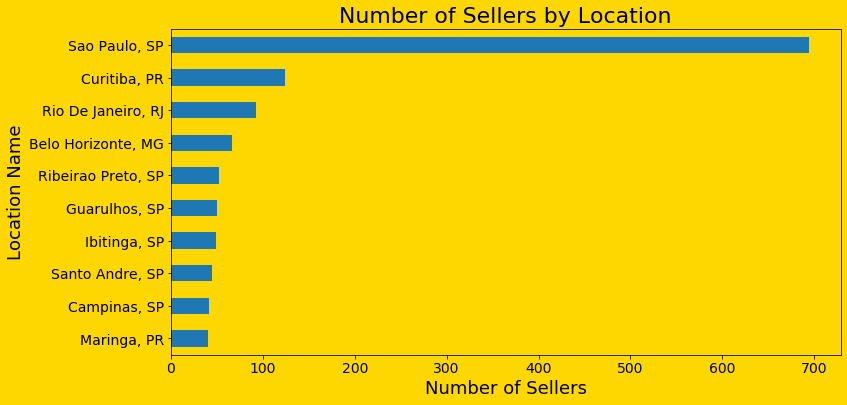

In [266]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_sell_city.plot(kind='barh')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Location Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Sellers by Location', fontsize=22)
plt.show()

In [268]:
sellers_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

14940    49
13660    10
16200     9
13920     9
1026      8
14020     8
87050     8
13481     7
37540     7
35530     6
Name: seller_zip_code_prefix, dtype: int64

In [269]:
top_10_zip = sellers_df['seller_zip_code_prefix'].value_counts().sort_values(ascending=True).tail(10)

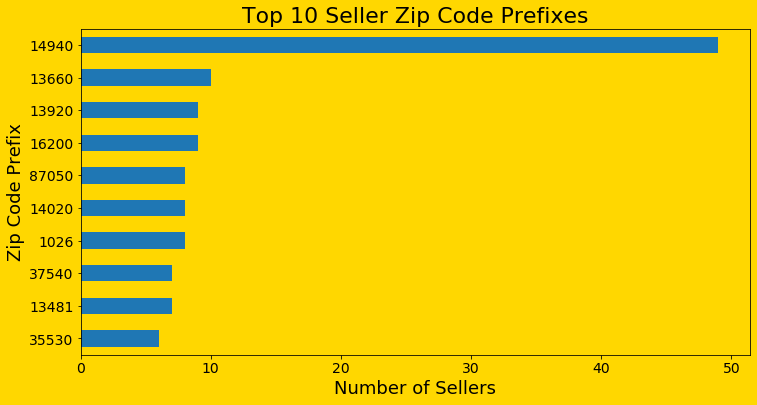

In [271]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_zip.plot(kind='barh')
plt.xlabel('Number of Sellers', fontsize=18)
plt.ylabel('Zip Code Prefix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Top 10 Seller Zip Code Prefixes', fontsize=22)
plt.show()

### 3b) Orders Dataset

In [282]:
orders_df.head()

,order_id,customer_id,order_status,order_approved,delivered_to_carrier,delivered_to_customer,estimated_delivery_to_customer,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [287]:
orders_df['order_month_year'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)

2017-11    7544
2018-01    7269
2018-03    7211
2018-04    6939
2018-05    6873
2018-02    6728
2018-08    6512
2018-07    6292
2018-06    6167
2017-12    5673
Freq: M, Name: order_month_year, dtype: int64

### 3?) Customers Dataset

In [ ]:
customers_df.head()

In [ ]:
top_10_city = customers_df['customer_city'].value_counts().sort_values(ascending=
                                                                       True).tail(10).sort_values(ascending=False)
top_10_city

In [ ]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_city.plot(kind='barh')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('State Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Customers by City', fontsize=22)
plt.show()

In [ ]:
top_10_state = customers_df['customer_state'].value_counts().sort_values(ascending=True).tail(10).sort_values(ascending=False)
top_10_state

In [ ]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_state.plot(kind='barh')
plt.xlabel('Number of Customers', fontsize=18)
plt.ylabel('State Name', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Number of Customers by State', fontsize=22)
plt.show()

### 3b) Customers Dataset

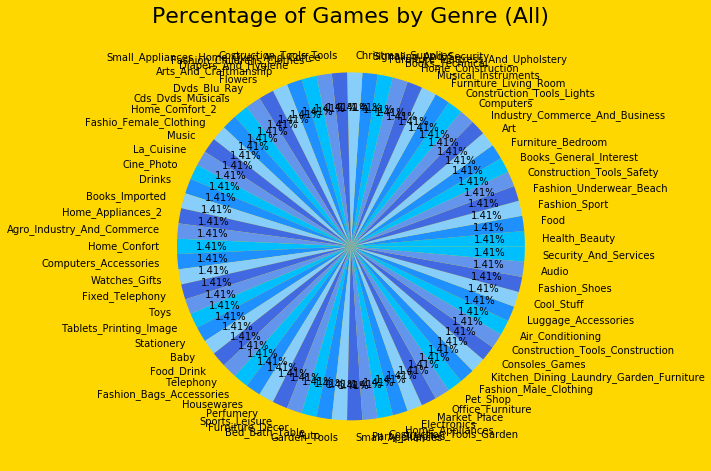

In [273]:
# Make this real lol

vc = prod_cat_df['category_name_eng'].value_counts()
labels = vc.index

plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(prod_cat_df['category_name_eng'].value_counts(), labels=labels, colors=colors, autopct='%1.2f%%', pctdistance=.8)
plt.title('Percentage of Games by Genre (All)', fontsize=22)
plt.show()